<div style='background-image: url("../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">ObsPy Tutorial</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Downloading Data</div>
        </div>
    </div>
</div>

Seismo-Live: http://seismo-live.org

##### Authors:
* Lion Krischer ([@krischer](https://github.com/krischer))
* Tobias Megies ([@megies](https://github.com/megies))
---

![](images/obspy_logo_full_524x179px.png)

In [ ]:
%matplotlib inline
#from __future__ import print_function
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

ObsPy has clients to directly fetch data via...

- FDSN webservices (IRIS, Geofon/GFZ, USGS, NCEDC, SeisComp3 instances, ...)
- ArcLink (EIDA, ...)
- Earthworm
- SeedLink (near-realtime servers)
- NERIES/NERA/seismicportal.eu
- NEIC
- SeisHub (local seismological database)

This introduction shows how to use the FDSN webservice client. The FDSN webservice definition is by now the default web service implemented by many data centers world wide. Clients for other protocols work similar to the FDSN client.

#### Waveform Data

2 Trace(s) in Stream:
II.PFO.00.LHZ | 2011-03-11T05:56:23.069500Z - 2011-03-11T06:16:22.069500Z | 1.0 Hz, 1200 samples
II.PFO.10.LHZ | 2011-03-11T05:56:23.069500Z - 2011-03-11T06:16:22.069500Z | 1.0 Hz, 1200 samples


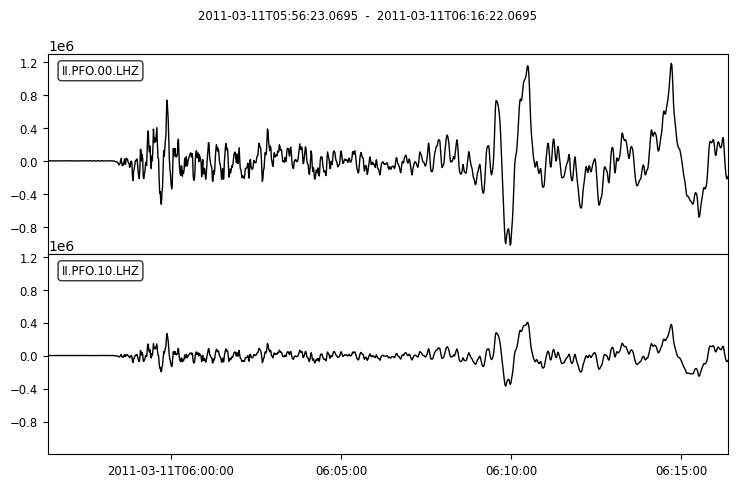

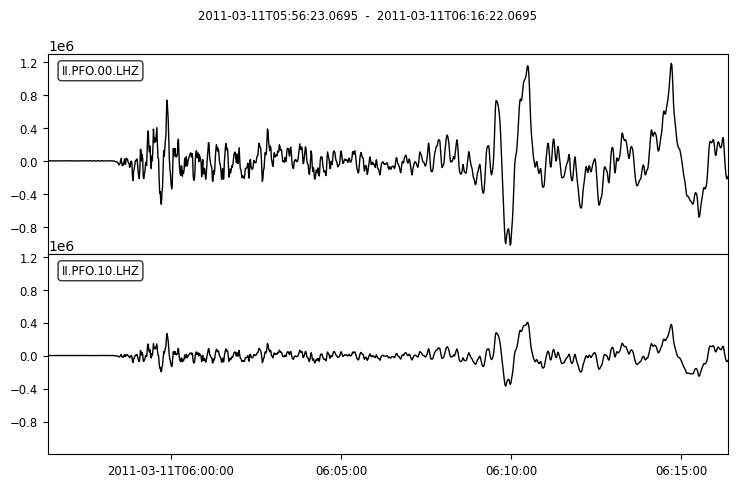

In [1]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

client = Client("IRIS")
t = UTCDateTime("2011-03-11T05:46:23")  # Tohoku Oki
st = client.get_waveforms("II", "PFO", "*", "LHZ",
                          t + 10 * 60, t + 30 * 60)
print(st)
st.plot()

- again, waveform data is returned as a Stream object
- for all custom processing workflows it does not matter if the data originates from a local file or from a web service

#### Event Metadata

The FDSN client can also be used to request event metadata:

2 Event(s) in Catalog:
2011-03-11T06:25:49.800000Z | +38.220, +144.660 | 7.6  mw | manual
2011-03-11T06:15:41.700000Z | +36.300, +141.130 | 7.9  mw | manual


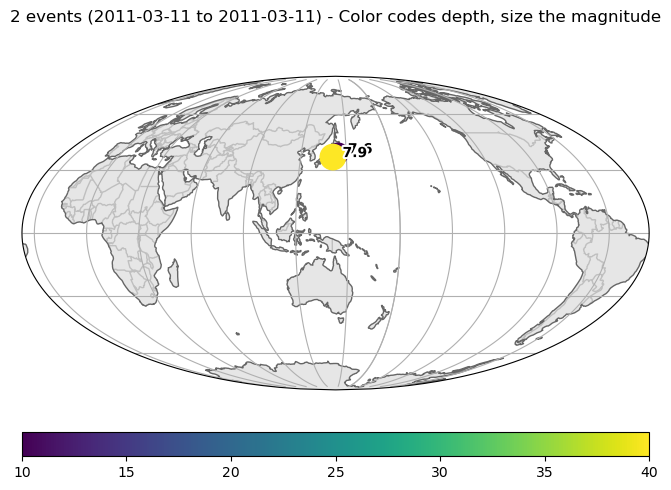

In [2]:
client = Client('EMSC')

t = UTCDateTime("2011-03-11T05:46:23")  # Tohoku Oki
catalog = client.get_events(starttime=t - 100, endtime=t + 24 * 3600,
                            minmagnitude=7,maxmagnitude=8)
print(catalog)
catalog.plot();

Requests can have a wide range of constraints (see [ObsPy Documentation](http://docs.obspy.org/packages/autogen/obspy.fdsn.client.Client.get_events.html)):

- time range
- geographical (lonlat-box, circular by distance)
- depth range
- magnitude range, type
- contributing agency

#### Station Metadata

Finally, the FDSN client can be used to request station metadata. Stations can be looked up using a wide range of constraints (see [ObsPy documentation](http://docs.obspy.org/packages/autogen/obspy.fdsn.client.Client.get_stations.html)):

 * network/station code
 * time range of operation
 * geographical (lonlat-box, circular by distance)

Inventory created at 2023-07-24T12:46:12.789594Z
	Sending institution: SeisComP (BGR)
	Contains:
		Networks (10):
			BQ, GQ, GR, HS, KQ, LE, RN, SX, TH, YA
		Stations (215):
			BQ.BA01 (Aachen)
			BQ.BA02 (Stolberg)
			BQ.BA03 (Weisweiler)
			BQ.BA04 (Friesheim)
			BQ.BA05 (Sindorf)
			BQ.BA06 (Horem)
			BQ.BA08 (Dellbrueck)
			BQ.BA09 (Bensberg)
			BQ.BA10 (Klein Altendorf)
			BQ.BA11 (Dueren)
			BQ.BA12 (Baesweiler)
			BQ.BA13 (Heinsberg)
			BQ.BA14 (Wollersheim)
			BQ.BA16 (Vanikum)
			BQ.BA17 (Viersen)
			BQ.BA18 (Steinbach)
			BQ.BA19 (Cologne Cathedral - Basement)
			BQ.BA20 (Cologne Cathedral - High roof)
			BQ.BA26 (Cologne University)
			BQ.BA30 (Duerwiss)
			BQ.BGG (Eltz Castle)
			BQ.BNS (Bensberg)
			BQ.DREG (Dreilaegerbach)
			BQ.HILG (Hillesheim)
			BQ.HOBG (Hohbusch)
			BQ.JUE (Juelich)
			BQ.KLL (Kalltalsperre)
			BQ.KOE (Koeppel)
			BQ.LAUG (Laupendahl)
			BQ.NAST (Nastaetten)
			BQ.RODG (Dalheim Roedgen)
			BQ.STB (Steinbachtalsperre)
			GQ.R1906 (BGR Station R1906)
	

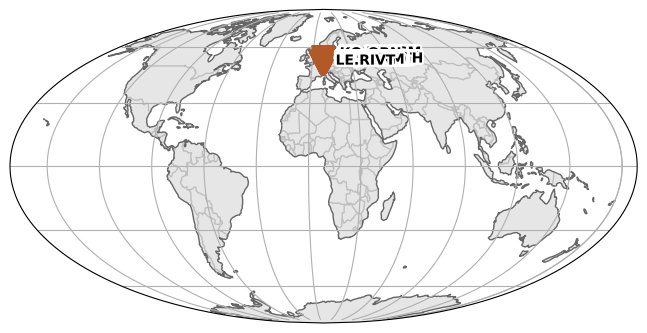

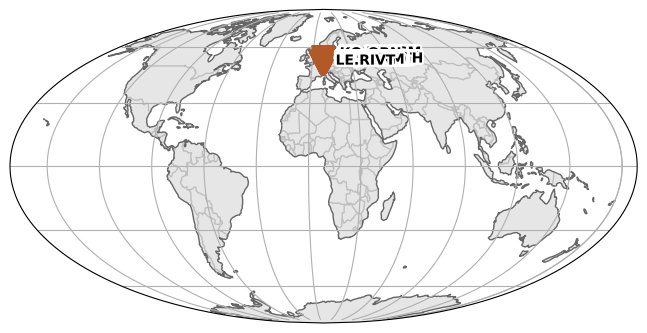

In [4]:
client = Client("BGR")
#event = catalog[0]
#origin = event.origins[0]

# Münster
lon = 7.63
lat = 51.96

inventory = client.get_stations(longitude=lon, latitude=lat,
                                maxradius=2.5, level="response")
print(inventory)
inventory.plot()

The **`level=...`** keyword is used to specify the level of detail in the requested inventory

- `"network"`: only return information on networks matching the criteria
- `"station"`: return information on all matching stations
- `"channel"`: return information on available channels in all stations networks matching the criteria
- `"response"`: include instrument response for all matching channels (large result data size!)

In [5]:
client = Client("IRIS")
inventory = client.get_stations(network="GE", station="STU",
                                level="response")
print(inventory)

Inventory created at 2023-07-24T12:50:22.853400Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?network=GE&station=S...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			GE
		Stations (4):
			GE.STU (VBB Station Stuttgart, Germany) (4x)
		Channels (39):
			GE.STU..BHZ (4x), GE.STU..BHN (4x), GE.STU..BHE (4x), GE.STU..HHZ, 
			GE.STU..HHN, GE.STU..HHE, GE.STU..LHZ (4x), GE.STU..LHN (4x), 
			GE.STU..LHE (4x), GE.STU..VHZ (4x), GE.STU..VHN (4x), 
			GE.STU..VHE (4x)


In [6]:
inventory = client.get_stations(network="OE", station="DAVA",
                                level="channel")
print(inventory)

Inventory created at 2023-07-24T12:50:33.486200Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?network=OE&station=D...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			OE
		Stations (1):
			OE.DAVA (Damuels, Vorarlberg, Austria)
		Channels (14):
			OE.DAVA..BHZ, OE.DAVA..BHN, OE.DAVA..BHE, OE.DAVA..HHZ, 
			OE.DAVA..HHN, OE.DAVA..HHE, OE.DAVA..LCQ, OE.DAVA..LHZ, 
			OE.DAVA..LHN, OE.DAVA..LHE, OE.DAVA..UFC, OE.DAVA..VHZ, 
			OE.DAVA..VHN, OE.DAVA..VHE


For waveform requests that include instrument correction, the appropriate instrument response information can be attached to waveforms automatically:     
(Of course, for work on large datasets, the better choice is to download all station information and avoid the internal repeated webservice requests)

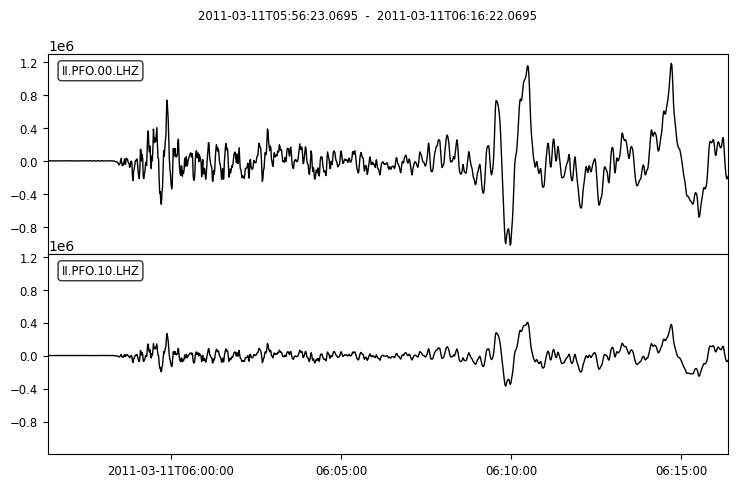

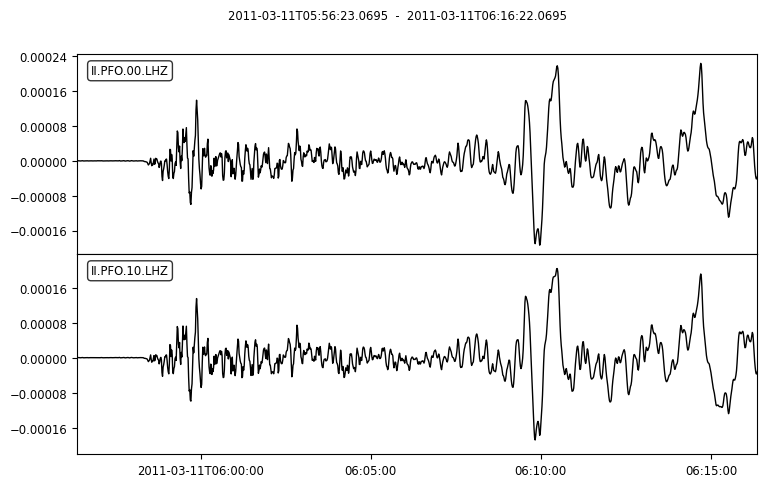

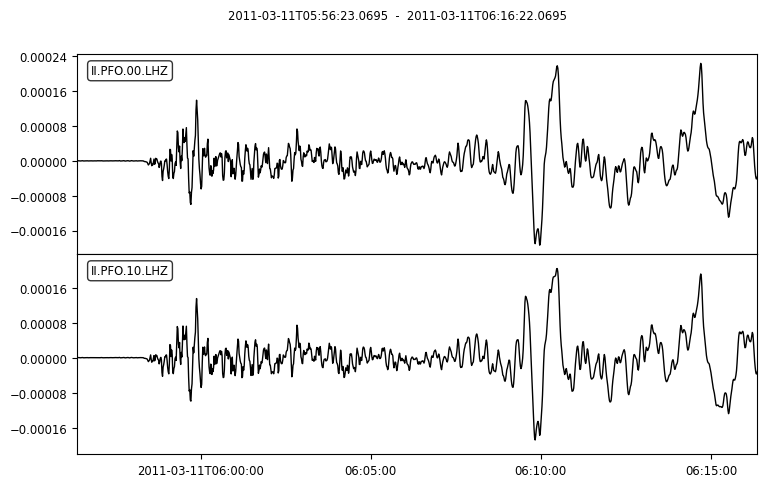

In [7]:
t = UTCDateTime("2011-03-11T05:46:23")  # Tohoku
st = client.get_waveforms("II", "PFO", "*", "LHZ",
                          t + 10 * 60, t + 30 * 60, attach_response=True)
st.plot()

st.remove_sensitivity()
st.plot()

All data requested using the FDSN client can be directly saved to file using the **`filename="..."`** option. The data is then stored exactly as it is served by the data center, i.e. without first parsing by ObsPy and outputting by ObsPy.

In [ ]:
client.get_events(starttime=t-100, endtime=t+24*3600, minmagnitude=7,
                  filename="/tmp/requested_events.xml")
client.get_stations(network="OE", station="DAVA", level="station",
                    filename="/tmp/requested_stations.xml")
client.get_waveforms("II", "PFO", "*", "LHZ", t + 10 * 60, t + 30 * 60,
                     filename="/tmp/requested_waveforms.mseed")
!ls -lrt /tmp/requested*
client.get_events?

#### FDSN Client Exercise

Use the FDSN client to assemble a waveform dataset for on event.

- search for a large earthquake (e.g. by depth or in a region of your choice, use option **`limit=5`** to keep network traffic down)

In [8]:
cl = Client("IRIS")
cat = cl.get_events(limit=5,minmagnitude=7.5,starttime=UTCDateTime(2023,2,5),endtime=UTCDateTime(2023,2,8))
print(cat)

2 Event(s) in Catalog:
2023-02-06T10:24:49.258000Z | +38.023,  +37.203 | 7.5  mww
2023-02-06T01:17:34.362000Z | +37.225,  +37.021 | 7.8  mww


- search for stations to look at waveforms for the event. stations should..
    * be available at the time of the event
    * have a vertical 1 Hz stream ("LHZ", to not overpower our network..)
    * be in a narrow angular distance around the event (e.g. 90-91 degrees)
    * adjust your search so that only a small number of stations (e.g. 3-6) match your search criteria

In [11]:
inv = cl.get_stations(starttime=UTCDateTime(2023,2,5),endtime=UTCDateTime(2023,2,8)
                      ,longitude=+38.023, latitude=+37.203, minradius=4,maxradius=5,level="response")
print(inv)

Inventory created at 2023-07-24T13:06:11.167700Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2023-02-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (4):
			GE, IM, IU, SY
		Stations (15):
			GE.CSS (GEOFON/GII Station Mathiatis, Cyprus)
			GE.KSDI (GII Station Kfar Sold, Israel)
			IM.CY401 (RAF Akrotiri, Cyprus, Site CY401)
			IM.CY501 (temp)
			IM.CY601 (RAF Akrotiri, Cyprus, Site CY601)
			IM.CY602 (RAF Akrotiri, Cyprus, Site CY602)
			IM.CY603 (RAF Akrotiri, Cyprus, Site CY603)
			IM.CY604 (RAF Akrotiri, Cyprus, Site CY604)
			IM.CY605 (RAF Akrotiri, Cyprus, Site CY605)
			IM.CY606 (RAF Akrotiri, Cyprus, Site CY606)
			IU.ANTO (Ankara, Turkey)
			SY.ANTO (ANTO synthetic)
			SY.CSS (CSS synthetic)
			SY.KSDI (KSDI synthetic)
			SY.MRNI (MRNI synthetic)
		Channels (149):
			GE.CSS..BHZ, GE.CSS..BHN, GE.CSS..BHE, GE.CSS..BLZ, GE.CSS..BLN, 
			GE.CSS..BLE, GE.CSS..HHZ, GE.CSS..HHN, G

- for each of these stations download data of the event, e.g. a couple of minutes before to half an hour after the event
- put all data together in one stream (put the `get_waveforms()` call in a try/except/pass block to silently skip stations that actually have no data available)
- print stream info, plot the raw data

In [26]:
cl = Client("GFZ")
start = UTCDateTime("2023-02-06T01:17:34.362000Z")-2*60
end = UTCDateTime()
st = cl.get_waveforms("GE","STU","*","BH?",starttime=UTCDateTime("2023-02-06T01:17:34.362000Z")-2*60,
                     endtime=UTCDateTime("2023-02-06T01:17:34.362000Z")+20*60)
inv = cl.get_stations(network="GE",station="STU",location="",channel="BH?",starttime=start,level="response")
print(inv)


Inventory created at 2023-07-24T13:16:10.321938Z
	Sending institution: SeisComP (GFZ)
	Contains:
		Networks (1):
			GE
		Stations (1):
			GE.STU (VBB Station Stuttgart, Germany)
		Channels (3):
			GE.STU..BHZ, GE.STU..BHN, GE.STU..BHE


- correct the instrument response for all stations and plot the corrected data

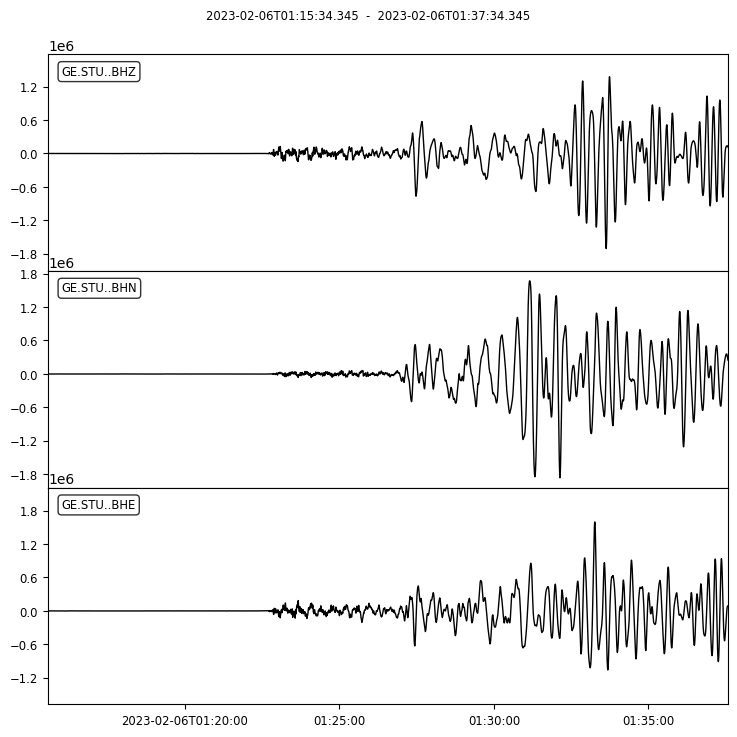

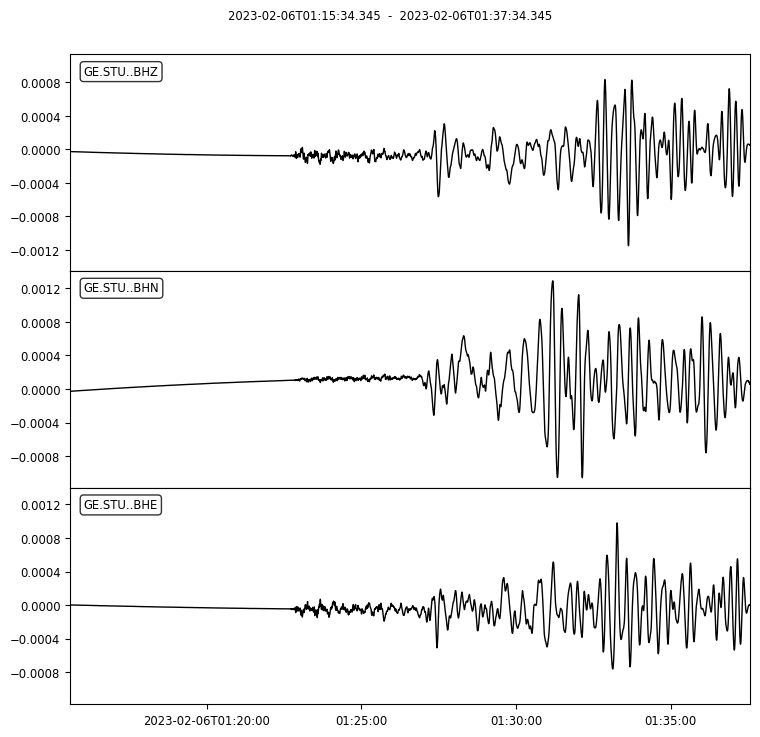

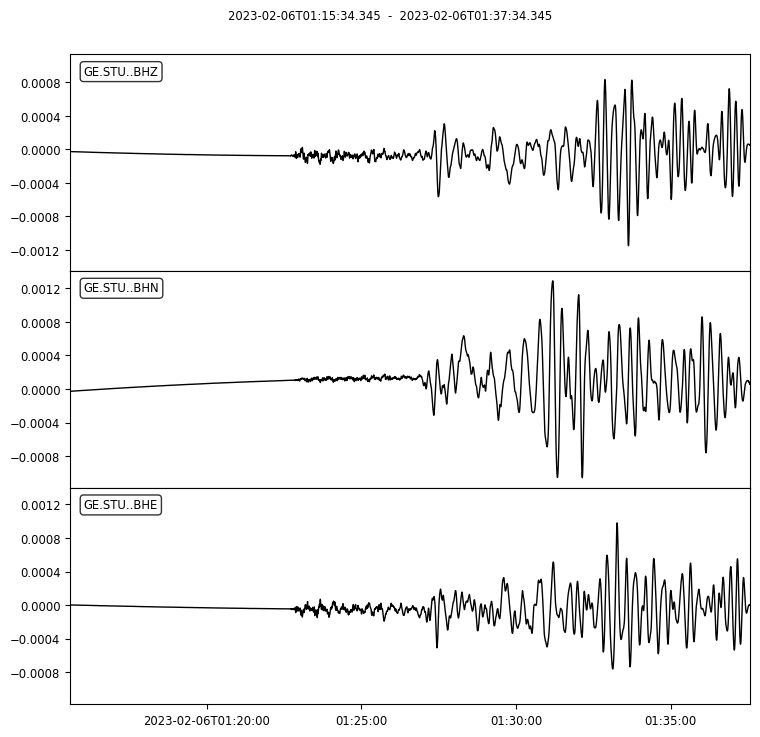

In [28]:
st.attach_response(inventories=inv)
st.plot()
st.remove_response()
st.plot()

If you have time, assemble and plot another similar dataset (e.g. like before stations at a certain distance from a big event, or use Transportable Array data for a big event, etc.)

## Routing or Federator Client are also existing!!

In [ ]:
from obspy.clients.fdsn import RoutingClient

eida = RoutingClient("eida-routing")
tr = eida.get_waveforms()
iris = RoutingClient("iris-federator")